# Importing libraries

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import mlflow
from mlflow.models import infer_signature
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, precision_recall_curve, auc
from sklearn.pipeline import Pipeline

# Loading Train, Validation and Test data

## Train Data

In [2]:
msg_train = pd.read_csv('./data/train.csv')

## Validation Data

In [3]:
msg_val = pd.read_csv('./data/validation.csv')

## Test Data

In [4]:
msg_test = pd.read_csv('./data/test.csv')

# Preprocessing data for the model

In [ ]:
# preprocessing pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer())
])

In [ ]:
# fit the pipeline on training data
corpus = msg_train['message']
pipeline.fit(corpus)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('tfidf', TfidfTransformer())])

## Prepare train, validation and test data

In [7]:
X_train = pipeline.transform(msg_train['message'])
X_val = pipeline.transform(msg_val['message'])
X_test = pipeline.transform(msg_test['message'])

In [8]:
y_train = msg_train['label']
y_val = msg_val['label']
y_test = msg_test['label']

# Model Evaluation Metric AUC-PR

In [ ]:
# function to print AUCPR and plot Precision-Recall curve
def print_aucpr(y_true, y_scores):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    auc_pr = auc(recall, precision)
    print("The AUCPR is = " + str(auc_pr))
    plt.figure(figsize=(5, 5))
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

In [10]:
# function for calculating PR AUC
def pr_auc(y_true, y_pred):
    p, r, _ = precision_recall_curve(y_true, y_pred, pos_label=1) # spam is the positive label
    return auc(r, p)

# Model Selection

We choose to use the following three models for spam/ham classification.

1. Naive Bayes
2. Logistic Regression
3. Support Vector Machine

## Dataframe to store AUC-PR of each model

In [11]:
df = pd.DataFrame(np.zeros((3, 1)))
df.index = ["Naive Bayes", "Logistic Regression", "Support Vector Machines"]
df.columns = ["AUC-PR"]

# 1. Naive Bayes Classifier

In [12]:
MultinomialNB().get_params() # Multinomial Naive Bayes

{'alpha': 1.0, 'class_prior': None, 'fit_prior': True, 'force_alpha': True}

We choose the parameters for Multinomial Naive Bayes Classifier as the best parameter values that we arrived at in `Assignment1.ipynb`

In [13]:
with mlflow.start_run() as run:
    
    params = {"alpha": 0.05}
    model = MultinomialNB(**params)
    model.fit(X_train, y_train)


    y_pred = model.predict(X_val)
    signature = infer_signature(X_val, y_val)


    mlflow.log_params(params)
    mlflow.log_param("model_name", "Multinomial NB Model")
    mlflow.log_metrics({"AUC-PR": pr_auc(y_val, y_pred)})
    mlflow.log_metrics({"Accuracy": accuracy_score(y_val, y_pred)})
    mlflow.log_metrics({"F1-Score": f1_score(y_val, y_pred)})

    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="sklearn-model",
        signature=signature,
        registered_model_name="Multinomial NB Model",
    )

/home/utpalraj/coursework/AML/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Successfully registered model 'Multinomial NB Model'.
Created version '1' of model 'Multinomial NB Model'.


# 2. Logistic Regression

In [ ]:
LogisticRegression().get_params() # Logistic Regression parameters

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

We choose the parameters for Logistic Regression as the best parameter values that we arrived at in `Assignment1.ipynb`

In [15]:
with mlflow.start_run() as run:
    
    params = {"C": 50, "class_weight": "balanced"}
    model = LogisticRegression(**params)
    model.fit(X_train, y_train)


    y_pred = model.predict(X_val)
    signature = infer_signature(X_val, y_val)


    mlflow.log_params(params)
    mlflow.log_param("model_name", "Logistic Regression Model")
    mlflow.log_metrics({"AUC-PR": pr_auc(y_val, y_pred)})
    mlflow.log_metrics({"Accuracy": accuracy_score(y_val, y_pred)})
    mlflow.log_metrics({"F1-Score": f1_score(y_val, y_pred)})

    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="sklearn-model",
        signature=signature,
        registered_model_name="Logistic Regression Model",
    )

/home/utpalraj/coursework/AML/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Successfully registered model 'Logistic Regression Model'.
Created version '1' of model 'Logistic Regression Model'.


# 3. Support Vector Machines

In [ ]:
SVC().get_params() # Support Vector Classifier parameters

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

We choose the parameters for Support Vector Machines as the best parameter values that we arrived at in `Assignment1.ipynb`

In [17]:
with mlflow.start_run() as run:
    
    params = {"C": 5, "gamma": "scale", "kernel": "linear"}
    model = SVC(**params)
    model.fit(X_train, y_train)


    y_pred = model.predict(X_val)
    signature = infer_signature(X_val, y_val)


    mlflow.log_params(params)
    mlflow.log_param("model_name", "Support Vector Machines Model")
    mlflow.log_metrics({"AUC-PR": pr_auc(y_val, y_pred)})
    mlflow.log_metrics({"Accuracy": accuracy_score(y_val, y_pred)})
    mlflow.log_metrics({"F1-Score": f1_score(y_val, y_pred)})

    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="sklearn-model",
        signature=signature,
        registered_model_name="Support Vector Machines Model",
    )

/home/utpalraj/coursework/AML/lib/python3.12/site-packages/mlflow/types/utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
Successfully registered model 'Support Vector Machines Model'.
Created version '1' of model 'Support Vector Machines Model'.


# Loading the Naive Bayes Model

The AUCPR is = 0.9604319939634032


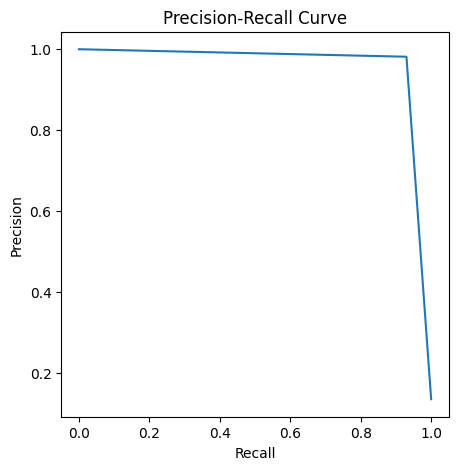

In [18]:
logged_model = "runs:/a1136e07ef84423f8aaa998fac9d112a/sklearn-model"

model = mlflow.pyfunc.load_model(logged_model)
y_pred = model.predict(X_test)
print_aucpr(y_test, y_pred)

In [19]:
df['AUC-PR']['Naive Bayes'] = pr_auc(y_test, y_pred)

/tmp/ipykernel_26450/177837224.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['AUC-PR']['Naive Bayes'] = pr_auc(y_test, y_pred)


# Loading the Logistic Regression Model

The AUCPR is = 0.9471687307001398


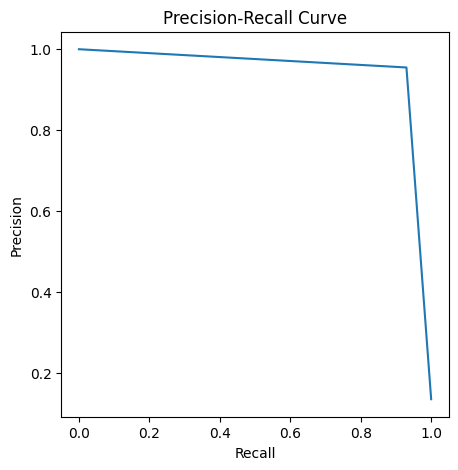

In [21]:
logged_model = "runs:/c8f5d6fb7d574c7fae126048e30cd5c0/sklearn-model"

model = mlflow.pyfunc.load_model(logged_model)
y_pred = model.predict(X_test)
print_aucpr(y_test, y_pred)

In [22]:
df['AUC-PR']['Logistic Regression'] = pr_auc(y_test, y_pred)

/tmp/ipykernel_26450/3642964274.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['AUC-PR']['Logistic Regression'] = pr_auc(y_test, y_pred)


# Loading the Support Vector Machines Model

The AUCPR is = 0.9604319939634032


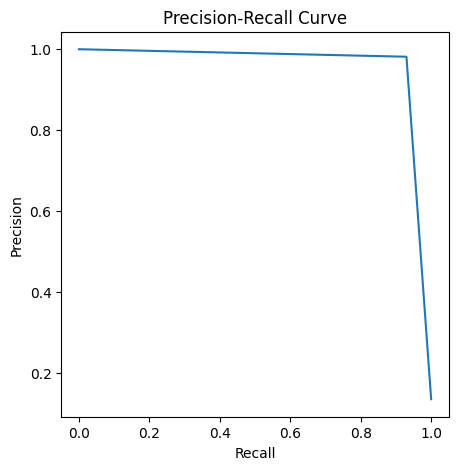

In [23]:
logged_model = "runs:/1bf58736924c42d5a983c09473c49a78/sklearn-model"

model = mlflow.pyfunc.load_model(logged_model)
y_pred = model.predict(X_test)
print_aucpr(y_test, y_pred)

In [24]:
df['AUC-PR']['Support Vector Machines'] = pr_auc(y_test, y_pred)

/tmp/ipykernel_26450/3414528594.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['AUC-PR']['Support Vector Machines'] = pr_auc(y_test, y_pred)


# Running MLFlow UI

In [27]:
!mlflow ui

[2025-02-16 06:15:19 +0000] [28752] [INFO] Starting gunicorn 23.0.0
[2025-02-16 06:15:19 +0000] [28752] [INFO] Listening at: http://127.0.0.1:5000 (28752)
[2025-02-16 06:15:19 +0000] [28752] [INFO] Using worker: sync
[2025-02-16 06:15:19 +0000] [28753] [INFO] Booting worker with pid: 28753
[2025-02-16 06:15:19 +0000] [28757] [INFO] Booting worker with pid: 28757
[2025-02-16 06:15:19 +0000] [28761] [INFO] Booting worker with pid: 28761
[2025-02-16 06:15:19 +0000] [28762] [INFO] Booting worker with pid: 28762
[2025-02-16 06:16:15 +0000] [28752] [INFO] Handling signal: int
^C

Aborted!
[2025-02-16 06:16:15 +0000] [28762] [INFO] Worker exiting (pid: 28762)
[2025-02-16 06:16:15 +0000] [28753] [INFO] Worker exiting (pid: 28753)
[2025-02-16 06:16:15 +0000] [28761] [INFO] Worker exiting (pid: 28761)
[2025-02-16 06:16:15 +0000] [28757] [INFO] Worker exiting (pid: 28757)


# Best Model based on AUC-PR

In [26]:
df

,AUC-PR
Naive Bayes,0.960432
Logistic Regression,0.947169
Support Vector Machines,0.960432


- Both Naive Bayes and Support Vector Machines models have the highest AUC-PR value. 

- So they are both best in terms of AUC-PR. However if we take model complexity into consideration, Naive Bayes is a comparatively simpler model than Support Vector Machines. Therefore, we choose to select the `Naive Bayes` model as the best choice for spam/ham classification.